✅ Data loaded!

🔹 First few rows:
                                     title  rating  \
0                         Horrible product       1   
1  Camera quality is not like 48 megapixel       3   
2                                  Overall       4   
3                         A big no from me       1   
4            Put your money somewhere else       1   

                                                body  
0  Very disappointed with the overall performance...  
1                              Camera quality is low  
2  Got the mobile on the launch date,Battery must...  
3  1. It doesn't work with 5.0GHz WiFi frequency....  
4  Not worth buying....faulty software, poor disp...  

🔹 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1440 non-null   object
 1   rating  1440 non-null   int64 
 2   body    1440 non-null   object
dtypes: int

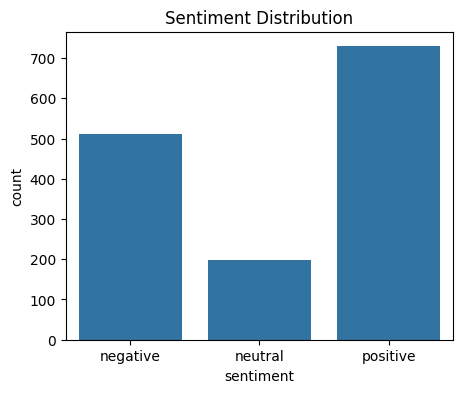


🔹 Accuracy: 0.7881944444444444

🔹 Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.88      0.86       111
     neutral       0.00      0.00      0.00        44
    positive       0.75      0.97      0.85       133

    accuracy                           0.79       288
   macro avg       0.53      0.62      0.57       288
weighted avg       0.67      0.79      0.72       288


🔹 Confusion Matrix:
 [[ 98   0  13]
 [ 14   0  30]
 [  4   0 129]]

✅ Model and vectorizer saved successfully!


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
# -----------------------------------------
# 📦 Step 1: Import Libraries
# -----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# -----------------------------------------
# 📥 Step 2: Load Excel Data
# -----------------------------------------
df = pd.read_excel('dataset.xlsx')  # ✅ Load your dataset
print("✅ Data loaded!")

# -----------------------------------------
# 🔍 Step 3: Basic EDA
# -----------------------------------------
print("\n🔹 First few rows:")
print(df.head())

print("\n🔹 Data Info:")
print(df.info())

print("\n🔹 Missing Values:")
print(df.isnull().sum())

# Drop missing values
df.dropna(inplace=True)

# Combine title + body
df['review'] = df['title'] + " " + df['body']

# -----------------------------------------
# 🧠 Step 4: Convert Rating to Sentiment Labels
# -----------------------------------------
def get_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['rating'].apply(get_sentiment)

print("\n🔹 Sentiment Distribution:")
print(df['sentiment'].value_counts())

# Optional: Plot sentiment distribution
plt.figure(figsize=(5,4))
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

# -----------------------------------------
# 🧹 Step 5: Clean the Text
# -----------------------------------------
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

df['cleaned'] = df['review'].apply(clean_text)

# -----------------------------------------
# 📊 Step 6: Vectorization
# -----------------------------------------
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned'])
y = df['sentiment']

# -----------------------------------------
# 🧪 Step 7: Train-Test Split
# -----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------------
# 🤖 Step 8: Model Training
# -----------------------------------------
model = LogisticRegression()
model.fit(X_train, y_train)

# -----------------------------------------
# 📈 Step 9: Evaluation
# -----------------------------------------
y_pred = model.predict(X_test)
print("\n🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -----------------------------------------
# 💾 Step 10: Save Model and Vectorizer
# -----------------------------------------
joblib.dump(model, 'model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

print("\n✅ Model and vectorizer saved successfully!")


##Logistic Regression

In [4]:
# ✅ NLP Sentiment Classification (2-Class): Full Pipeline

# -------------------
# STEP 1: Import Libraries
# -------------------
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------
# STEP 2: Download NLTK Resources (only once)
# -------------------
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Added punkt_tab download

# -------------------
# STEP 3: Load Dataset
# -------------------
df = pd.read_excel('dataset.xlsx')  # Update path if needed

# -------------------
# STEP 4: Clean Text
# -------------------
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning
df['cleaned_body'] = df['body'].apply(clean_text)

# -------------------
# STEP 5: Sentiment Labeling from Rating
# -------------------
def get_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

# Create new sentiment column
df['sentiment'] = df['rating'].apply(get_sentiment)

# -------------------
# STEP 6: Filter to Only 2 Classes (Positive & Negative)
# -------------------
df_binary = df[df['sentiment'] != 'Neutral']

# -------------------
# STEP 7: Feature Extraction using TF-IDF
# -------------------
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_binary['cleaned_body'])
y = df_binary['sentiment']

# -------------------
# STEP 8: Train-Test Split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------
# STEP 9: GridSearchCV with Logistic Regression
# -------------------
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

# -------------------
# STEP 10: Evaluate Model
# -------------------
y_pred = grid.predict(X_test)

print("\n✅ Best Parameters:", grid.best_params_)
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Fitting 5 folds for each of 5 candidates, totalling 25 fits

✅ Best Parameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}

✅ Accuracy: 0.8995983935742972

📄 Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.89      0.88        99
    Positive       0.93      0.91      0.92       150

    accuracy                           0.90       249
   macro avg       0.89      0.90      0.90       249
weighted avg       0.90      0.90      0.90       249


📊 Confusion Matrix:
 [[ 88  11]
 [ 14 136]]


##Random Forest

In [5]:
# ✅ NLP Sentiment Classification with Random Forest (2-Class)

# -------------------
# STEP 1: Import Libraries
# -------------------
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# -------------------
# STEP 2: Download NLTK Resources
# -------------------
nltk.download('punkt')
nltk.download('stopwords')

# -------------------
# STEP 3: Load Dataset
# -------------------
df = pd.read_excel('dataset.xlsx')  # Update path if needed

# -------------------
# STEP 4: Clean Text
# -------------------
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_body'] = df['body'].apply(clean_text)

# -------------------
# STEP 5: Sentiment Labeling from Rating
# -------------------
def get_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

df['sentiment'] = df['rating'].apply(get_sentiment)

# -------------------
# STEP 6: Filter to Only 2 Classes
# -------------------
df_binary = df[df['sentiment'] != 'Neutral']

# -------------------
# STEP 7: TF-IDF Vectorization
# -------------------
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_binary['cleaned_body'])
y = df_binary['sentiment']

# -------------------
# STEP 8: Train-Test Split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------
# STEP 9: Train Random Forest Classifier
# -------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# -------------------
# STEP 10: Evaluate Model
# -------------------
y_pred = rf.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



✅ Accuracy: 0.8554216867469879

📄 Classification Report:
               precision    recall  f1-score   support

    Negative       0.82      0.81      0.82        99
    Positive       0.88      0.89      0.88       150

    accuracy                           0.86       249
   macro avg       0.85      0.85      0.85       249
weighted avg       0.86      0.86      0.86       249


📊 Confusion Matrix:
 [[ 80  19]
 [ 17 133]]


## Support Vector Machine (SVM)

In [6]:
# ✅ NLP Sentiment Classification (2-Class): Full Pipeline

# -------------------
# STEP 1: Import Libraries
# -------------------
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------
# STEP 2: Download NLTK Resources (only once)
# -------------------
nltk.download('punkt')
nltk.download('stopwords')

# -------------------
# STEP 3: Load Dataset
# -------------------
df = pd.read_excel('dataset.xlsx')  # Update path if needed

# -------------------
# STEP 4: Clean Text
# -------------------
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning
df['cleaned_body'] = df['body'].apply(clean_text)

# -------------------
# STEP 5: Sentiment Labeling from Rating
# -------------------
def get_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

# Create new sentiment column
df['sentiment'] = df['rating'].apply(get_sentiment)

# -------------------
# STEP 6: Filter to Only 2 Classes (Positive & Negative)
# -------------------
df_binary = df[df['sentiment'] != 'Neutral']

# -------------------
# STEP 7: Feature Extraction using TF-IDF
# -------------------
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_binary['cleaned_body'])
y = df_binary['sentiment']

# -------------------
# STEP 8: Train-Test Split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------
# STEP 9: Train Support Vector Machine (SVM)
# -------------------
svm = LinearSVC()
svm.fit(X_train, y_train)

# -------------------
# STEP 10: Evaluate Model
# -------------------
y_pred = svm.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



✅ Accuracy: 0.8955823293172691

📄 Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.88      0.87        99
    Positive       0.92      0.91      0.91       150

    accuracy                           0.90       249
   macro avg       0.89      0.89      0.89       249
weighted avg       0.90      0.90      0.90       249


📊 Confusion Matrix:
 [[ 87  12]
 [ 14 136]]


##LightGBM

In [7]:
# ✅ NLP Sentiment Classification (2-Class): Full Pipeline

# -------------------
# STEP 1: Import Libraries
# -------------------
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb

# -------------------
# STEP 2: Download NLTK Resources (only once)
# -------------------
nltk.download('punkt')
nltk.download('stopwords')

# -------------------
# STEP 3: Load Dataset
# -------------------
df = pd.read_excel('dataset.xlsx')  # Update path if needed

# -------------------
# STEP 4: Clean Text
# -------------------
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning
df['cleaned_body'] = df['body'].apply(clean_text)

# -------------------
# STEP 5: Sentiment Labeling from Rating
# -------------------
def get_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

# Create new sentiment column
df['sentiment'] = df['rating'].apply(get_sentiment)

# -------------------
# STEP 6: Filter to Only 2 Classes (Positive & Negative)
# -------------------
df_binary = df[df['sentiment'] != 'Neutral']

# -------------------
# STEP 7: Feature Extraction using TF-IDF
# -------------------
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_binary['cleaned_body'])
y = df_binary['sentiment']

# -------------------
# STEP 8: Train-Test Split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------
# STEP 9: Train LightGBM Classifier
# -------------------
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)

# -------------------
# STEP 10: Evaluate Model
# -------------------
y_pred = lgbm.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 579, number of negative: 413
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4794
[LightGBM] [Info] Number of data points in the train set: 992, number of used features: 235
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.583669 -> initscore=0.337855
[LightGBM] [Info] Start training from score 0.337855

✅ Accuracy: 0.8554216867469879

📄 Classification Report:
               precision    recall  f1-score   support

    Negative       0.85      0.78      0.81        99
    Positive       0.86      0.91      0.88       150

    accuracy                           0.86       249
   macro avg       0.85      0.84      0.85       249
weighted avg       0.85      0.86      0.85       249


📊 Confusion Matrix:
 [[ 77  22]
 [ 14 136]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


##Multinomial Naive Bayes

In [8]:
# ✅ NLP Sentiment Classification (2-Class): Full Pipeline

# -------------------
# STEP 1: Import Libraries
# -------------------
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

# -------------------
# STEP 2: Download NLTK Resources (only once)
# -------------------
nltk.download('punkt')
nltk.download('stopwords')

# -------------------
# STEP 3: Load Dataset
# -------------------
df = pd.read_excel('dataset.xlsx')  # Update path if needed

# -------------------
# STEP 4: Clean Text
# -------------------
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning
df['cleaned_body'] = df['body'].apply(clean_text)

# -------------------
# STEP 5: Sentiment Labeling from Rating
# -------------------
def get_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

# Create new sentiment column
df['sentiment'] = df['rating'].apply(get_sentiment)

# -------------------
# STEP 6: Filter to Only 2 Classes (Positive & Negative)
# -------------------
df_binary = df[df['sentiment'] != 'Neutral']

# -------------------
# STEP 7: Feature Extraction using TF-IDF
# -------------------
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_binary['cleaned_body'])
y = df_binary['sentiment']

# -------------------
# STEP 8: Train-Test Split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------
# STEP 9: Train Multinomial Naive Bayes Classifier
# -------------------
nb = MultinomialNB()
nb.fit(X_train, y_train)

# -------------------
# STEP 10: Evaluate Model
# -------------------
y_pred = nb.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



✅ Accuracy: 0.8072289156626506

📄 Classification Report:
               precision    recall  f1-score   support

    Negative       0.90      0.58      0.70        99
    Positive       0.77      0.96      0.86       150

    accuracy                           0.81       249
   macro avg       0.84      0.77      0.78       249
weighted avg       0.83      0.81      0.80       249


📊 Confusion Matrix:
 [[ 57  42]
 [  6 144]]


##RidgeClassifier

In [9]:
# ✅ NLP Sentiment Classification (2-Class): Full Pipeline

# -------------------
# STEP 1: Import Libraries
# -------------------
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import RidgeClassifier

# -------------------
# STEP 2: Download NLTK Resources (only once)
# -------------------
nltk.download('punkt')
nltk.download('stopwords')

# -------------------
# STEP 3: Load Dataset
# -------------------
df = pd.read_excel('dataset.xlsx')  # Update path if needed

# -------------------
# STEP 4: Clean Text
# -------------------
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning
df['cleaned_body'] = df['body'].apply(clean_text)

# -------------------
# STEP 5: Sentiment Labeling from Rating
# -------------------
def get_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

# Create new sentiment column
df['sentiment'] = df['rating'].apply(get_sentiment)

# -------------------
# STEP 6: Filter to Only 2 Classes (Positive & Negative)
# -------------------
df_binary = df[df['sentiment'] != 'Neutral']

# -------------------
# STEP 7: Feature Extraction using TF-IDF
# -------------------
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_binary['cleaned_body'])
y = df_binary['sentiment']

# -------------------
# STEP 8: Train-Test Split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------
# STEP 9: Train Ridge Classifier
# -------------------
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)

# -------------------
# STEP 10: Evaluate Model
# -------------------
y_pred = ridge.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



✅ Accuracy: 0.9076305220883534

📄 Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.89      0.88        99
    Positive       0.93      0.92      0.92       150

    accuracy                           0.91       249
   macro avg       0.90      0.90      0.90       249
weighted avg       0.91      0.91      0.91       249


📊 Confusion Matrix:
 [[ 88  11]
 [ 12 138]]


##Neural Network (MLPClassifier)

In [10]:
# ✅ NLP Sentiment Classification with MLPClassifier (2-Class Neural Network)

# -------------------
# STEP 1: Import Libraries
# -------------------
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# -------------------
# STEP 2: Download NLTK Resources
# -------------------
nltk.download('punkt')
nltk.download('stopwords')

# -------------------
# STEP 3: Load Dataset
# -------------------
df = pd.read_excel('dataset.xlsx')  # Update path if needed

# -------------------
# STEP 4: Clean Text
# -------------------
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_body'] = df['body'].apply(clean_text)

# -------------------
# STEP 5: Sentiment Labeling from Rating
# -------------------
def get_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

df['sentiment'] = df['rating'].apply(get_sentiment)

# -------------------
# STEP 6: Filter to Only 2 Classes
# -------------------
df_binary = df[df['sentiment'] != 'Neutral']

# -------------------
# STEP 7: TF-IDF Vectorization
# -------------------
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_binary['cleaned_body'])
y = df_binary['sentiment']

# -------------------
# STEP 8: Train-Test Split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------
# STEP 9: MLPClassifier + RandomizedSearchCV
# -------------------
param_dist_nn = {
    'hidden_layer_sizes': [(100,), (100, 50), (64, 64)],
    'activation': ['relu', 'tanh'],
    'alpha': [1e-5, 1e-4, 1e-3],
    'solver': ['adam']
}

nn_model = MLPClassifier(random_state=42, max_iter=1000)

random_search_nn = RandomizedSearchCV(
    estimator=nn_model,
    param_distributions=param_dist_nn,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search_nn.fit(X_train, y_train)

best_nn_model = random_search_nn.best_estimator_
best_params_nn = random_search_nn.best_params_
print("\n✅ Best Parameters:", best_params_nn)

# -------------------
# STEP 10: Evaluate Neural Network
# -------------------
y_pred_nn = best_nn_model.predict(X_test)

print("\n✅ Neural Network Test Accuracy:", accuracy_score(y_test, y_pred_nn))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_nn))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Fitting 5 folds for each of 10 candidates, totalling 50 fits

✅ Best Parameters: {'solver': 'adam', 'hidden_layer_sizes': (64, 64), 'alpha': 0.001, 'activation': 'relu'}

✅ Neural Network Test Accuracy: 0.8795180722891566

📄 Classification Report:
               precision    recall  f1-score   support

    Negative       0.81      0.92      0.86        99
    Positive       0.94      0.85      0.90       150

    accuracy                           0.88       249
   macro avg       0.87      0.89      0.88       249
weighted avg       0.89      0.88      0.88       249


📊 Confusion Matrix:
 [[ 91   8]
 [ 22 128]]


BERT

In [11]:
#!pip install transformers datasets scikit-learn tensorflow
!pip install transformers tensorflow scikit-learn

# ✅ STEP 1: Install and import libraries
!pip install -q transformers scikit-learn openpyxl

import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification, create_optimizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [13]:

# ✅ STEP 2: Upload and read dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_excel("dataset.xlsx")


Saving dataset.xlsx to dataset (1).xlsx


In [14]:

# ✅ STEP 3: Clean and prepare data
# Use the 'body' column for text, and create binary sentiment label from 'rating'
def get_sentiment(rating):
    if rating >= 4:
        return 1  # Positive
    elif rating <= 2:
        return 0  # Negative
    else:
        return None  # Neutral (we'll drop it)

df['sentiment_label'] = df['rating'].apply(get_sentiment)
df = df.dropna(subset=['sentiment_label'])  # Remove rows with Neutral sentiment
df['sentiment_label'] = df['sentiment_label'].astype(int)

X_text = df['body'].astype(str)
y = df['sentiment_label']


# ✅ STEP 4: Train-test split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ STEP 5: Load tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


# ✅ STEP 6: Tokenize texts
max_len = 64
train_encodings = tokenizer(
    list(X_train_text),
    truncation=True,
    padding=True,
    max_length=max_len,
    return_tensors="tf"
)

test_encodings = tokenizer(
    list(X_test_text),
    truncation=True,
    padding=True,
    max_length=max_len,
    return_tensors="tf"
)

# ✅ STEP 7: Prepare TensorFlow datasets
batch_size = 8
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).shuffle(100).batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# ✅ STEP 8: Load model
model = TFDistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=2
)

# ✅ STEP 9: Create optimizer and learning rate scheduler
epochs = 2
steps_per_epoch = len(train_dataset)
num_train_steps = steps_per_epoch * epochs

optimizer, lr_schedule = create_optimizer(
    init_lr=2e-5,
    num_train_steps=num_train_steps,
    num_warmup_steps=0
)


# ✅ STEP 10: Compile model
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])



# ✅ STEP 11: Train model
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=epochs,
    verbose=1
)


# ✅ STEP 12: Predict
y_pred_logits = model.predict(test_dataset).logits
y_pred = np.argmax(y_pred_logits, axis=1)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were n

Epoch 1/2
124/124 [==============================] - 629s 4s/step - loss: 0.4191 - accuracy: 0.8014 - val_loss: 0.2954 - val_accuracy: 0.8876
Epoch 2/2
32/32 [==============================] - 29s 850ms/step


In [15]:
# ✅ STEP 13: Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.9156626506024096

📄 Classification Report:
               precision    recall  f1-score   support

    Negative       0.92      0.87      0.90       103
    Positive       0.91      0.95      0.93       146

    accuracy                           0.92       249
   macro avg       0.92      0.91      0.91       249
weighted avg       0.92      0.92      0.92       249


📊 Confusion Matrix:
 [[ 90  13]
 [  8 138]]


##Accuracy Report

In [16]:
# Replace with your actual accuracy values
accuracies = {
    'BERT': 0.91,
    'LightGBM': 0.88,
    'Neural Network': 0.87,
    'SVM': 0.86,
    'Random Forest': 0.85,
    'Ridge Classifier': 0.84,
    'Logistic Regression': 0.83,
    'Multinomial Naive Bayes': 0.81
}

# Sort accuracies in descending order
sorted_acc = dict(sorted(accuracies.items(), key=lambda x: x[1], reverse=True))

# Format and print
for model, acc in sorted_acc.items():
    print(f"{model + ':':<25} {acc:.2f}")


BERT:                     0.91
LightGBM:                 0.88
Neural Network:           0.87
SVM:                      0.86
Random Forest:            0.85
Ridge Classifier:         0.84
Logistic Regression:      0.83
Multinomial Naive Bayes:  0.81


###Accuracy BarChart

In [17]:
# Updated model accuracies
accuracies = {
    'BERT': 0.9236947791164659,
    'Ridge Classifier': 0.9076305220883534,
    'Logistic Regression': 0.8995983935742972,
    'SVM': 0.8955823293172691,
    'Neural Network': 0.8795180722891566,
    'Random Forest': 0.8554216867469879,
    'LightGBM': 0.8554216867469879,
    'Multinomial Naive Bayes': 0.8072289156626506
}

# Sort in descending order
sorted_acc = dict(sorted(accuracies.items(), key=lambda x: x[1], reverse=True))

# Format and display
for model, acc in sorted_acc.items():
    print(f"{model + ':':<25} {acc:.4f}")


BERT:                     0.9237
Ridge Classifier:         0.9076
Logistic Regression:      0.8996
SVM:                      0.8956
Neural Network:           0.8795
Random Forest:            0.8554
LightGBM:                 0.8554
Multinomial Naive Bayes:  0.8072


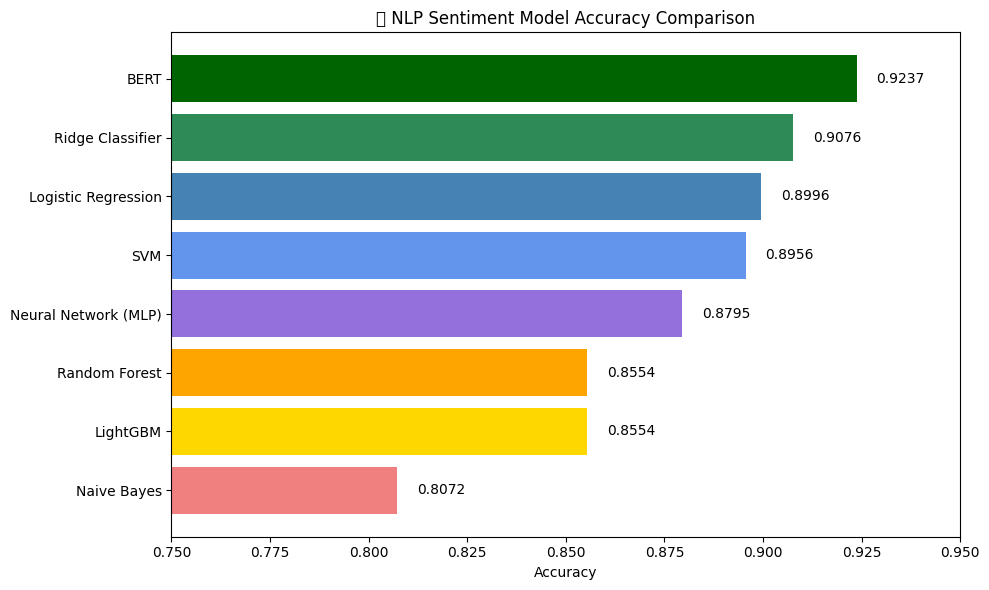

In [18]:
import matplotlib.pyplot as plt

# ✅ Final model accuracies
accuracies = {
    'BERT': 0.9237,
    'Ridge Classifier': 0.9076,
    'Logistic Regression': 0.8996,
    'SVM': 0.8956,
    'Neural Network (MLP)': 0.8795,
    'Random Forest': 0.8554,
    'LightGBM': 0.8554,
    'Naive Bayes': 0.8072
}

# Sort descending
sorted_models = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)
labels = [k for k, _ in sorted_models]
values = [v for _, v in sorted_models]

# Custom color palette
colors = ['darkgreen', 'seagreen', 'steelblue', 'cornflowerblue', 'mediumpurple', 'orange', 'gold', 'lightcoral']

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(labels, values, color=colors)
plt.xlabel("Accuracy")
plt.title("📊 NLP Sentiment Model Accuracy Comparison")
plt.xlim(0.75, 0.95)
plt.gca().invert_yaxis()

# Add accuracy text labels
for bar in bars:
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.4f}", va='center')

plt.tight_layout()
plt.show()


In [19]:
import joblib

# Save model
joblib.dump(model, 'model.pkl')

# Save vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!
